ML models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow import keras

In [42]:
# Specify the path to the CSV file
file_path = "mental_health_retention_IterativeInsights_simulated_data.csv"

# Read the CSV file into a dataframe
df = pd.read_csv(file_path)

# Remove Login_Datetimes
df.drop('Login_Datetimes', axis=1, inplace=True)

df

,ID,Age,Sex,MH_score,Participant_Satisfaction_Score,Num_Logins,Recency,Frequency,Latency,Responsiveness,Retention
0,310112,17,Male,4,2,10,10,2,8.777778,4.0,1
1,582107,13,Male,6,2,19,6,4,4.555556,2.2,1
2,242101,13,Male,4,3,19,11,9,3.944444,2.2,1
3,338903,15,Female,7,2,17,1,6,5.250000,2.6,0
4,733817,18,Female,7,2,12,1,4,7.909091,3.6,0
...,...,...,...,...,...,...,...,...,...,...,...
995,667957,16,Female,6,2,14,10,2,5.538462,3.2,0
996,334964,18,Female,1,3,8,15,2,9.142857,4.4,1
997,271062,14,Female,9,4,25,5,13,3.375000,1.0,1
998,696853,17,Male,3,2,9,20,1,7.000000,4.2,0


In [8]:
# Scale variables

# Define the columns to be scaled
numerical_columns = ['Age', 'MH_score', 'Participant_Satisfaction_Score', 'Num_Logins', 'Recency', 'Frequency', 'Latency', 'Responsiveness']

# Create a ColumnTransformer to apply the scaler to the numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), numerical_columns)
    ], remainder='passthrough')

# Apply the transformation to your data
scaled_data = preprocessor.fit_transform(df)

# Get the column names after scaling
all_column_names = numerical_columns + ['ID', 'Sex', 'Retention'] #list(df.columns[len(numerical_columns):])

# Create a new DataFrame with the scaled data and the retained column names
scaled_data = pd.DataFrame(scaled_data, columns=all_column_names)
#scaled_data = pd.DataFrame(scaled_data)
new_column_order = ['ID', 'Sex', 'Age', 'MH_score', 'Participant_Satisfaction_Score', 'Num_Logins', 'Recency', 'Frequency', 'Latency', 'Responsiveness', 'Retention']
df = scaled_data[new_column_order]
df = pd.DataFrame(df)
df


,ID,Sex,Age,MH_score,Participant_Satisfaction_Score,Num_Logins,Recency,Frequency,Latency,Responsiveness,Retention
0,310112,Male,0.880032,-0.520769,-0.98235,-1.455709,0.723034,-1.383763,1.810102,1.455709,1
1,582107,Male,-1.402801,0.509437,-0.98235,0.638167,0.006982,-0.574071,-0.585634,-0.638167,1
2,242101,Male,-1.402801,-0.520769,0.003945,0.638167,0.902047,1.450158,-0.932385,-0.638167,1
3,338903,Female,-0.261384,1.024539,-0.98235,0.172861,-0.888083,0.23562,-0.191598,-0.172861,0
4,733817,Female,1.45074,1.024539,-0.98235,-0.990403,-0.888083,-0.574071,1.317199,0.990403,0
...,...,...,...,...,...,...,...,...,...,...,...
995,667957,Female,0.309324,0.509437,-0.98235,-0.525097,0.723034,-1.383763,-0.027922,0.525097,0
996,334964,Female,1.45074,-2.066077,0.003945,-1.921014,1.618099,-1.383763,2.017252,1.921014,1
997,271062,Female,-0.832093,2.054745,0.99024,2.034084,-0.172031,3.069541,-1.255494,-2.034084,1
998,696853,Male,0.880032,-1.035872,-0.98235,-1.688362,2.513164,-1.788609,0.801371,1.688362,0


In [29]:
predictor_variables = df[['Age', 'MH_score', 'Participant_Satisfaction_Score', 'Num_Logins', 'Recency', 'Frequency', 'Latency', 'Responsiveness']].astype(float)
outcome_variable = df['Retention'].astype(int)

# Fit the logistic regression model
logit_model = sm.Logit(outcome_variable, predictor_variables)
result = logit_model.fit(max_iter=100)

# Print the summary of the logistic regression model
print(result.summary())

# Get the odds ratios and their confidence intervals
odds_ratios = result.params
confidence_intervals = result.conf_int()

         Current function value: 0.581899
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              Retention   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      993
Method:                           MLE   Df Model:                            6
Date:                Fri, 07 Jul 2023   Pseudo R-squ.:                  0.1169
Time:                        10:46:04   Log-Likelihood:                -581.90
converged:                      False   LL-Null:                       -658.96
Covariance Type:            nonrobust   LLR p-value:                 1.043e-30
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Age                               -0.5540      0.715     -0.775      0.439      -1.956       0.848
MH_sc

c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\statsmodels\base\optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method newton is: tol, ridge_factor. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
c:\Users\s1989190\AppData\Local\anaconda3\envs\lara\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


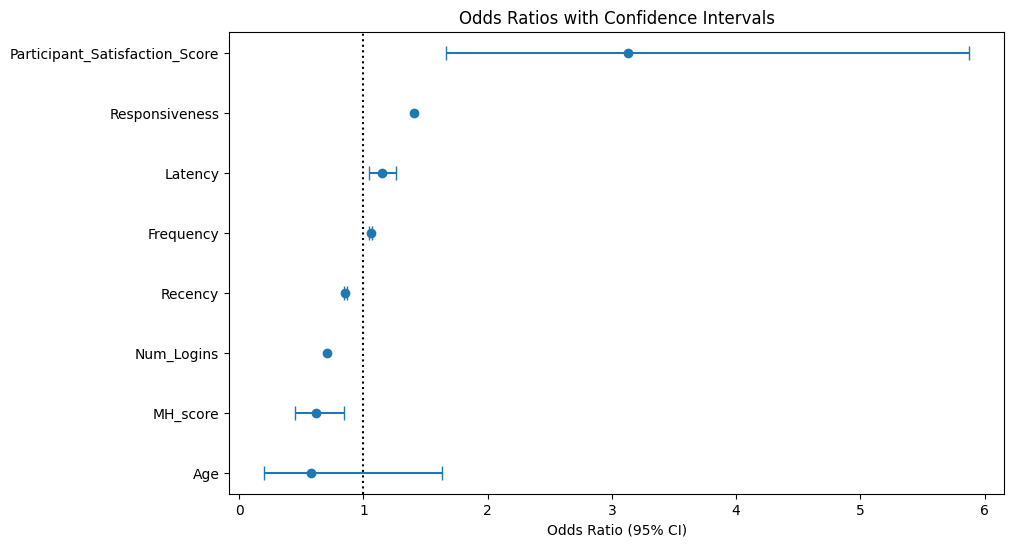

Odds Ratios: Age                               1.629799
MH_score                          0.841210
Participant_Satisfaction_Score    5.873534
Num_Logins                             NaN
Recency                           0.869564
Frequency                         1.068754
Latency                           1.265968
Responsiveness                         NaN
dtype: float64 Age                               0.202631
MH_score                          0.453370
Participant_Satisfaction_Score    1.664578
Num_Logins                             NaN
Recency                           0.840346
Frequency                         1.048903
Latency                           1.043025
Responsiveness                         NaN
dtype: float64


In [24]:
variable_names = ['Age', 'MH_score', 'Participant_Satisfaction_Score', 'Num_Logins', 'Recency', 'Frequency', 'Latency', 'Responsiveness']

# Get the parameter estimates
odds_ratios = np.exp(result.params)

# Get the standard errors of the parameter estimates
standard_errors = result.bse

# Calculate the confidence intervals
alpha = 0.05  # Set the desired significance level
z_critical = np.abs(np.random.normal(0, 1, size=len(odds_ratios)))  # Z-score corresponding to the significance level
lower_bounds = odds_ratios * np.exp(-z_critical * standard_errors)
upper_bounds = odds_ratios * np.exp(z_critical * standard_errors)

# Create a DataFrame to store the odds ratios and confidence intervals
data = pd.DataFrame({'Odds Ratio': odds_ratios,
                                     'Lower Bound': lower_bounds,
                                     'Upper Bound': upper_bounds})

#data = data[1:] # remove const

data["variable"] = variable_names

# Sort the data by odds ratio in descending order
data = data.sort_values(by='Odds Ratio', ascending=True)

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the odds ratios with confidence intervals
plt.errorbar(data['Odds Ratio'], range(len(data)), xerr=[data['Odds Ratio'] - data['Lower Bound'], data['Upper Bound'] - data['Odds Ratio']],
             fmt='o', capsize=5)

# Add a dotted black line at y=1
plt.axvline(x=1, color='black', linestyle='dotted')

# Set the y-axis labels
plt.yticks(range(len(data)), data['variable'])

# Set the x-axis label
plt.xlabel('Odds Ratio (95% CI)')

# Set the plot title
plt.title('Odds Ratios with Confidence Intervals')

# Show the plot
plt.show()

# Print odds ratios
print("Odds Ratios:", upper_bounds, lower_bounds)

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictor_variables, outcome_variable, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print('Training set shape:', X_train.shape, y_train.shape)
print('Testing set shape:', X_test.shape, y_test.shape)

# Check the number of 0s and 1s in the training and testing sets
print("Training Set:", y_train.value_counts())
print("Testing Set:", y_test.value_counts())

Training set shape: (800, 8) (800,)
Testing set shape: (200, 8) (200,)
Training Set: Retention
1    506
0    294
Name: count, dtype: int64
Testing Set: Retention
1    124
0     76
Name: count, dtype: int64


In [31]:
# Elastic Net Regression
# Create an instance of the ElasticNet model
elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.5)  # Set the regularization parameters

# Fit the model to the training data
elastic_net.fit(X_train, y_train)

# Make predictions on the test data
y_pred = elastic_net.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print("Coefficients", elastic_net.coef_)

Mean Squared Error: 0.23575624999999995
Coefficients [-0. -0.  0.  0. -0.  0. -0. -0.]


Accuracy: 0.635


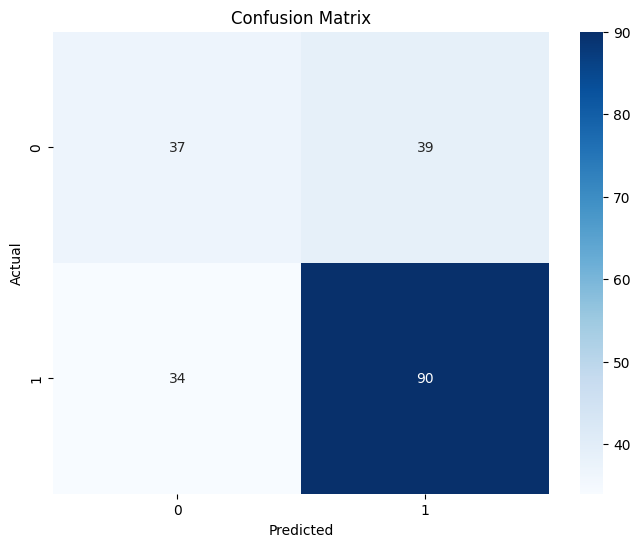

In [32]:
# XGBoost
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Epoch 1/10
25/25 [==============================] - 1s 10ms/step - loss: 0.6607 - accuracy: 0.6263 - val_loss: 0.6136 - val_accuracy: 0.7050
Epoch 2/10
25/25 [==============================] - 0s 3ms/step - loss: 0.5794 - accuracy: 0.7038 - val_loss: 0.6009 - val_accuracy: 0.6800
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 0.5442 - accuracy: 0.7125 - val_loss: 0.5916 - val_accuracy: 0.6800
Epoch 4/10
25/25 [==============================] - 0s 3ms/step - loss: 0.5277 - accuracy: 0.7138 - val_loss: 0.5975 - val_accuracy: 0.6750
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: 0.5200 - accuracy: 0.7250 - val_loss: 0.6013 - val_accuracy: 0.6750
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 0.5157 - accuracy: 0.7262 - val_loss: 0.5968 - val_accuracy: 0.6850
Epoch 7/10
25/25 [==============================] - 0s 3ms/step - loss: 0.5140 - accuracy: 0.7287 - val_loss: 0.6018 - val_accuracy: 0.6850
Epoch 8/10
25/25 [=

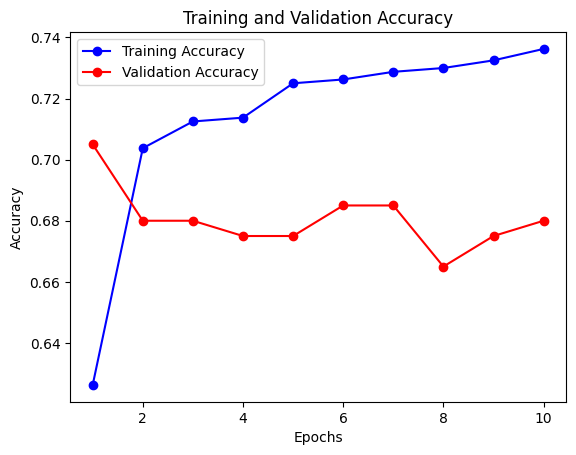

7/7 [==============================] - 0s 999us/step


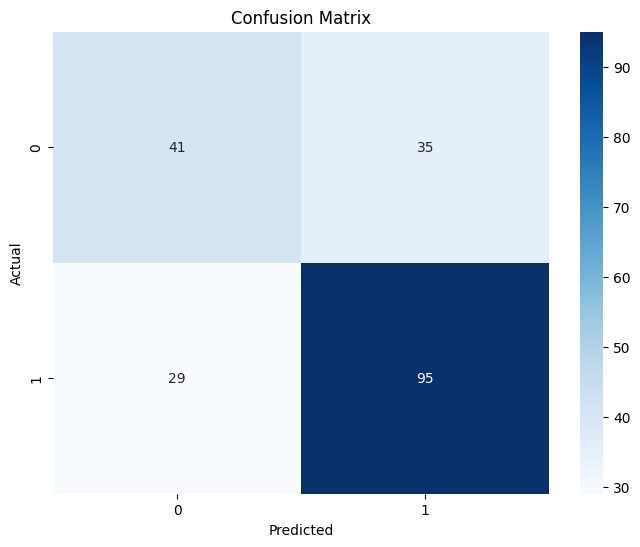

In [28]:
# Neural Network
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(8,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


# Train the model and store the training history
#history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Access the accuracy values from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the accuracy at each epoch
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Confusion matrix
# Make predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Flatten the predictions and ground truth labels
#y_pred = np.squeeze(y_pred)
#y_test = np.squeeze(y_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.69
[[ 37  39]
 [ 23 101]]


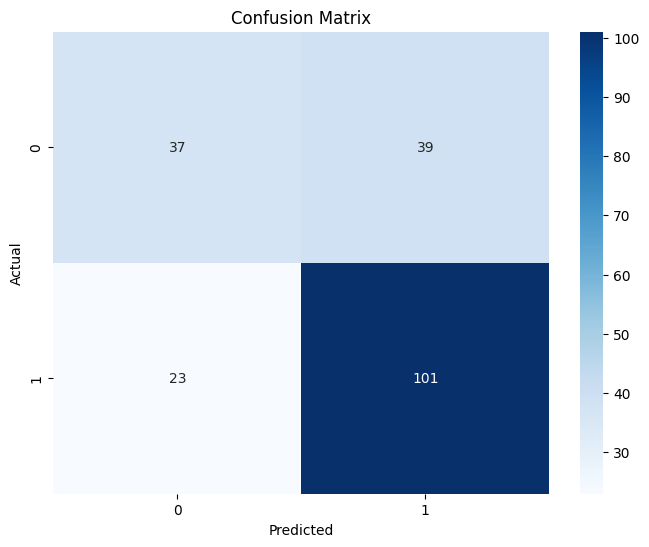

In [33]:
# Calculate risk scores with Logistic Regression

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

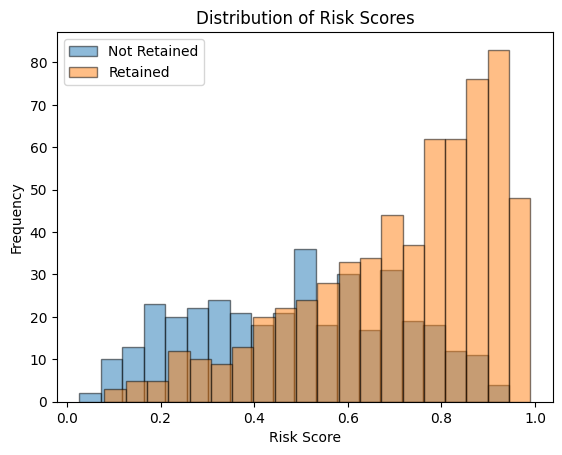

In [34]:
# Generate risk scores for each ID
risk_scores = model.predict_proba(df[['Age', 'MH_score', 'Participant_Satisfaction_Score', 'Num_Logins', 'Recency', 'Frequency', 'Latency', 'Responsiveness']])[:, 1]

# Add the risk scores to the dataframe
df['risk_score'] = risk_scores

# Plot the risk scores as a histogram
plt.hist(df['risk_score'][df['Retention'] == 0], bins=20, edgecolor='black', alpha=0.5, label='Not Retained')
plt.hist(df['risk_score'][df['Retention'] == 1], bins=20, edgecolor='black', alpha=0.5, label='Retained')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.title('Distribution of Risk Scores')
plt.legend()
plt.show()

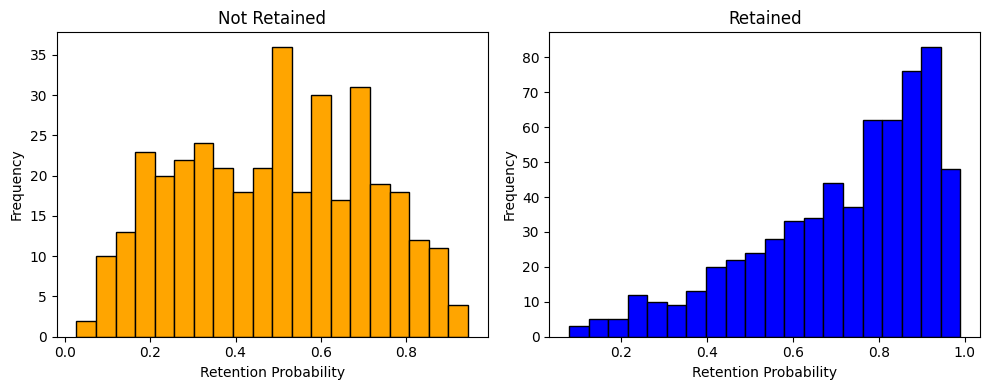

In [37]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the histogram for retention 0
axs[0].hist(df['risk_score'][df['Retention'] == 0], bins=20, edgecolor='black', color = 'orange')
axs[0].set_xlabel('Retention Probability')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Not Retained')

# Plot the histogram for retention 1
axs[1].hist(df['risk_score'][df['Retention'] == 1], bins=20, edgecolor='black', color = 'blue')
axs[1].set_xlabel('Retention Probability')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Retained')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [40]:
df[['risk_score', 'Retention']][df['risk_score'] < 0.5].groupby('Retention').size()

Retention
0    183
1    102
dtype: int64

In [41]:
# Allocates individuals with a retention score less than 0.5 to a recovery strategy

def allocate_recovery_strategy(risk_score):
    if risk_score < 0.5:
        return "Recovery Strategy A"
    else:
        return "Recovery Strategy B"